## Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

## Loading the dataset ( heart.csv )

In [ ]:
data = pd.read_csv("/content/heart.csv")
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
print(data.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


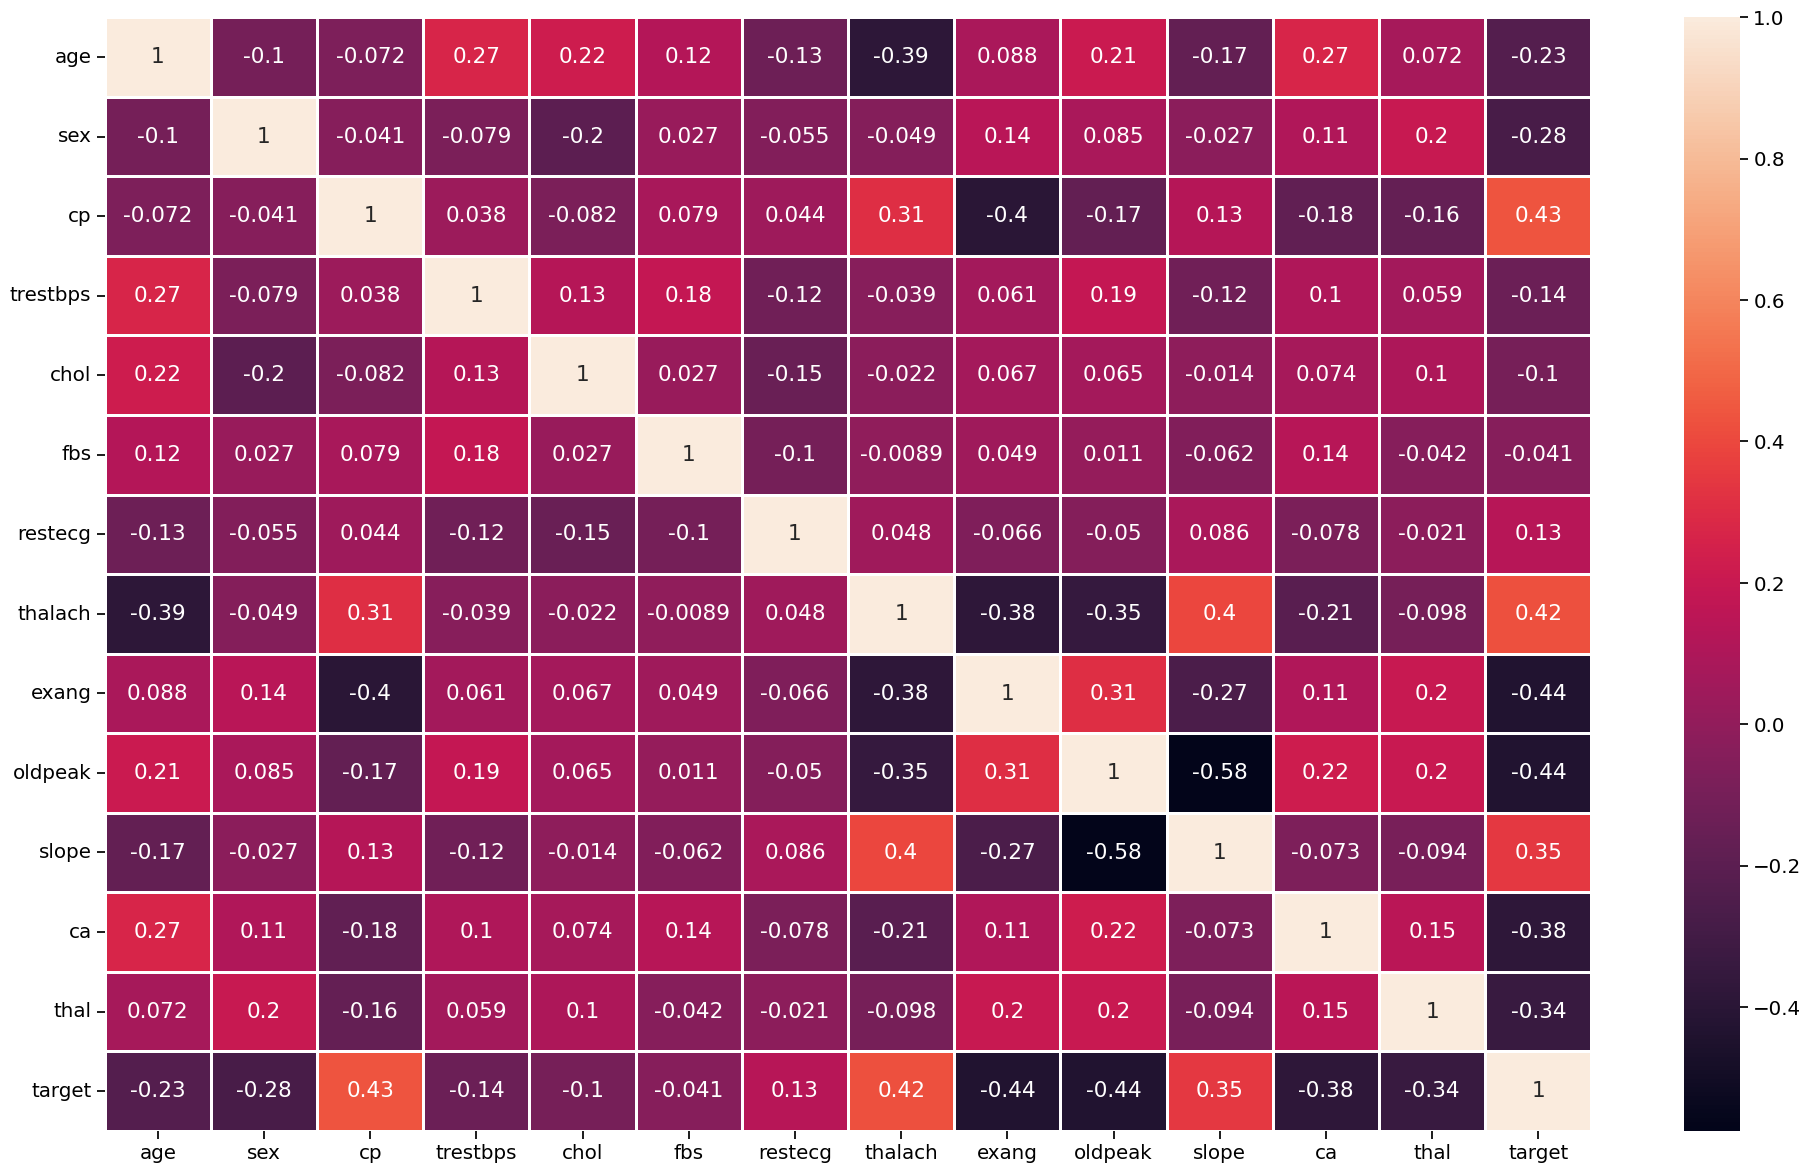

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(data.corr(),annot=True,linewidth =2)
plt.tight_layout()

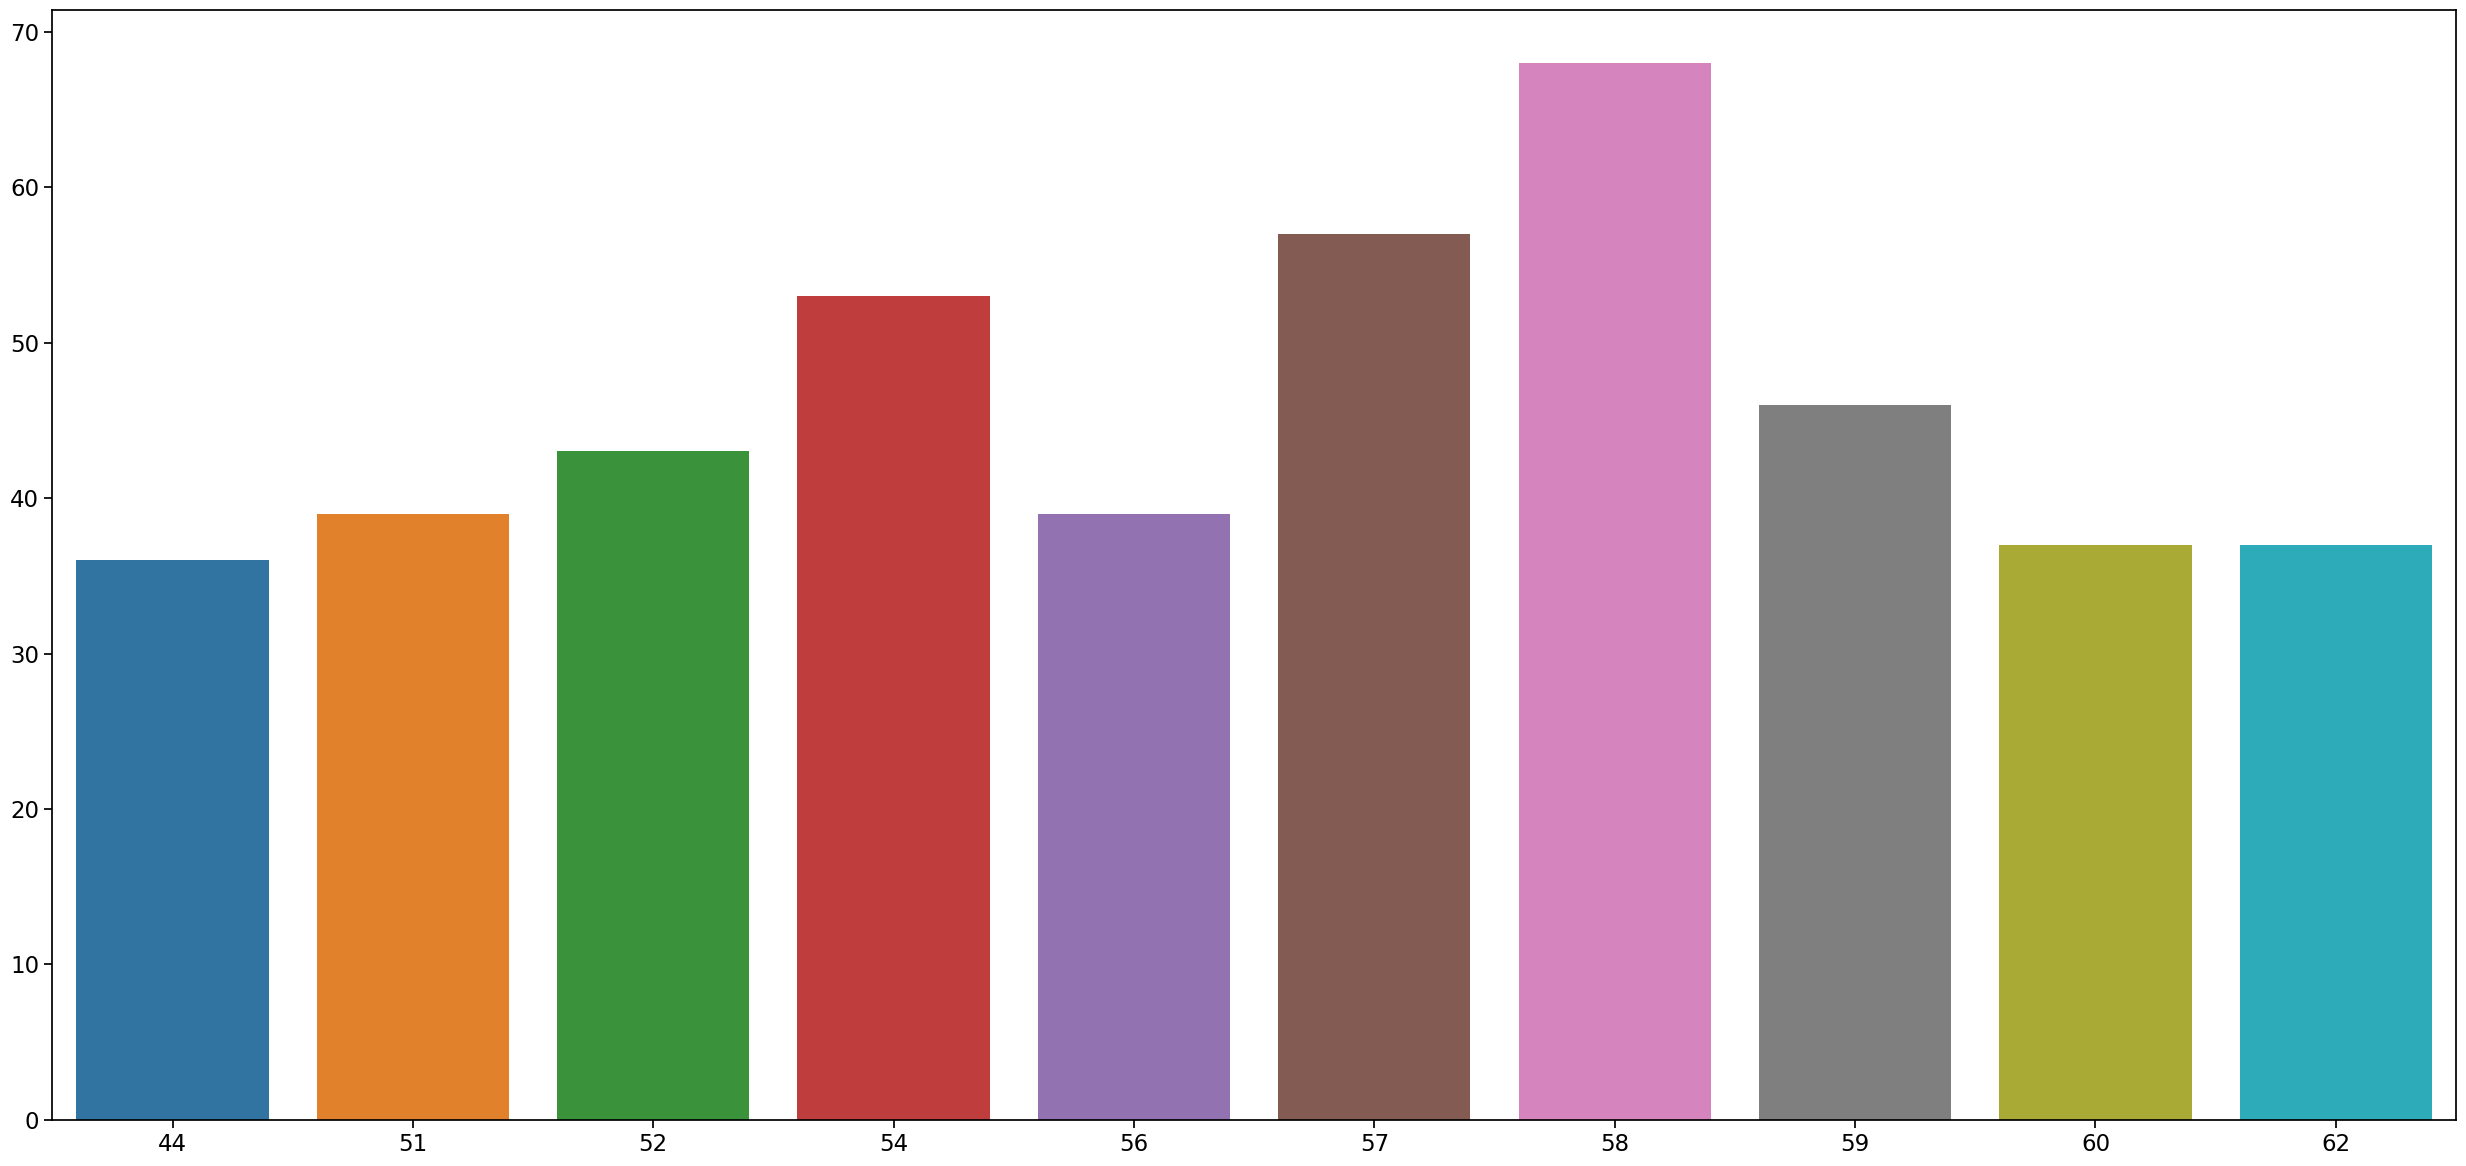

In [ ]:
plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=data.age.value_counts()[:10].index,y=data.age.value_counts()[:10].values)
plt.tight_layout()

In [ ]:
print("Total rows : ", len(data.index))
print("Total columns : ", len(data.columns))

Total rows :  1025
Total columns :  14


## Separating independent and dependent variables

In [ ]:
X = data.iloc[:, :10].values
y = data.iloc[:, -1:].values

In [ ]:
print(X[:5])

[[ 52.    1.    0.  125.  212.    0.    1.  168.    0.    1. ]
 [ 53.    1.    0.  140.  203.    1.    0.  155.    1.    3.1]
 [ 70.    1.    0.  145.  174.    0.    1.  125.    1.    2.6]
 [ 61.    1.    0.  148.  203.    0.    1.  161.    0.    0. ]
 [ 62.    0.    0.  138.  294.    1.    1.  106.    0.    1.9]]


In [ ]:
print(y[:5])

[[0]
 [0]
 [0]
 [0]
 [0]]


## Spliting the dataset into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print(X_train[:5])

[[ 42.    1.    3.  148.  244.    0.    0.  178.    0.    0.8]
 [ 66.    0.    2.  146.  278.    0.    0.  152.    0.    0. ]
 [ 53.    1.    2.  130.  246.    1.    0.  173.    0.    0. ]
 [ 58.    0.    0.  100.  248.    0.    0.  122.    0.    1. ]
 [ 53.    1.    0.  123.  282.    0.    1.   95.    1.    2. ]]


In [ ]:
print(X_test[:5])

[[ 44.    1.    2.  130.  233.    0.    1.  179.    1.    0.4]
 [ 58.    0.    1.  136.  319.    1.    0.  152.    0.    0. ]
 [ 63.    1.    0.  140.  187.    0.    0.  144.    1.    4. ]
 [ 58.    1.    2.  140.  211.    1.    0.  165.    0.    0. ]
 [ 61.    1.    0.  120.  260.    0.    1.  140.    1.    3.6]]


In [ ]:
print(y_train[:5])

[[1]
 [1]
 [1]
 [1]
 [0]]


In [ ]:
print(y_test[:5])

[[1]
 [0]
 [0]
 [1]
 [0]]


## Feature scaling using standardscaler

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
print(X_train[:5])

[[-1.40503359  0.64895597  1.97748631  0.94789007 -0.05867706 -0.42209113
  -0.97184588  1.2581775  -0.7200823  -0.21279468]
 [ 1.26270023 -1.5409366   1.01170979  0.83269632  0.59516646 -0.42209113
  -0.97184588  0.12806525 -0.7200823  -0.9282909 ]
 [-0.18232226  0.64895597  1.01170979 -0.08885372 -0.02021568  2.36915665
  -0.97184588  1.04084822 -0.7200823  -0.9282909 ]
 [ 0.37345562 -1.5409366  -0.91984324 -1.81676004  0.01824571 -0.42209113
  -0.97184588 -1.17591042 -0.7200823  -0.03392063]
 [-0.18232226  0.64895597 -0.91984324 -0.49203186  0.67208923 -0.42209113
   0.92106058 -2.34948852  1.38873015  0.86044964]]


In [ ]:
print(X_test[:5])

[[-1.03300622  0.71228712  1.09476414 -0.10442434 -0.17740746 -0.40592207
   0.77887076  1.29197851  1.46759877 -0.58869767]
 [ 0.47193177 -1.40392824  0.09731237  0.22746698  1.55730884  2.46352705
  -1.14484618  0.11522994 -0.68138514 -0.88090838]
 [ 1.00940963  0.71228712 -0.9001394   0.44872787 -1.10527897 -0.40592207
  -1.14484618 -0.2334363   1.46759877  2.0411987 ]
 [ 0.47193177  0.71228712  1.09476414  0.44872787 -0.62117209  2.46352705
  -1.14484618  0.68181259 -0.68138514 -0.88090838]
 [ 0.79441849  0.71228712 -0.9001394  -0.65757655  0.36721278 -0.40592207
   0.77887076 -0.40776942  1.46759877  1.74898799]]


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_Randomforest = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state = 0)
model_Randomforest.fit(X_train, y_train)

<ipython-input-96-8bc499758cbc>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_Randomforest.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_predict_RF = model_Randomforest.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_predict_RF)
accuracy = accuracy_score(y_test, y_predict_RF)*100

<ipython-input-109-3c6e49560931>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data['thalach'])


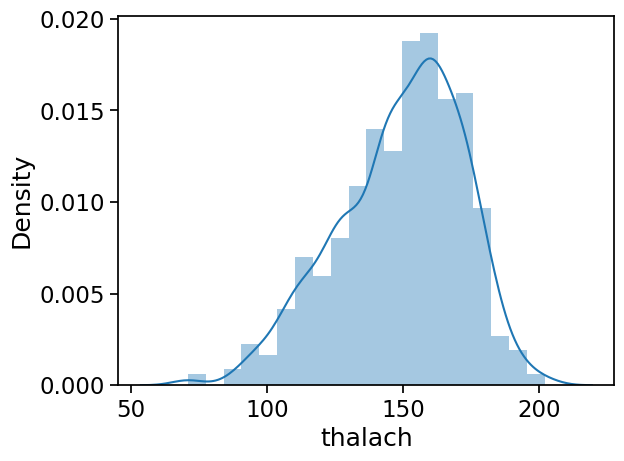

In [ ]:
import seaborn as sns
ax = sns.distplot(data['thalach'])

<ipython-input-110-7cef1355ac21>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data["chol"])


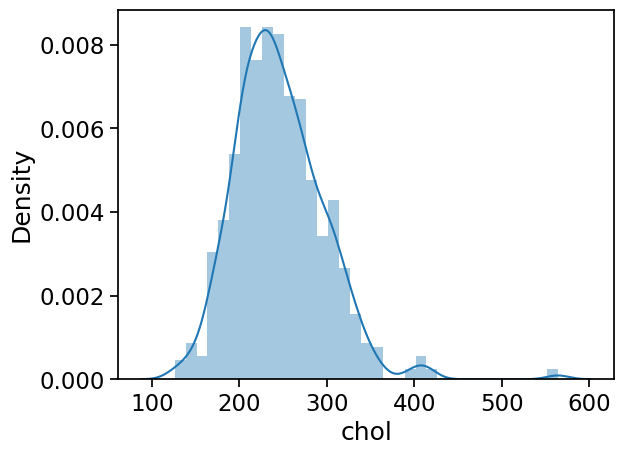

In [ ]:
ax = sns.distplot(data["chol"])

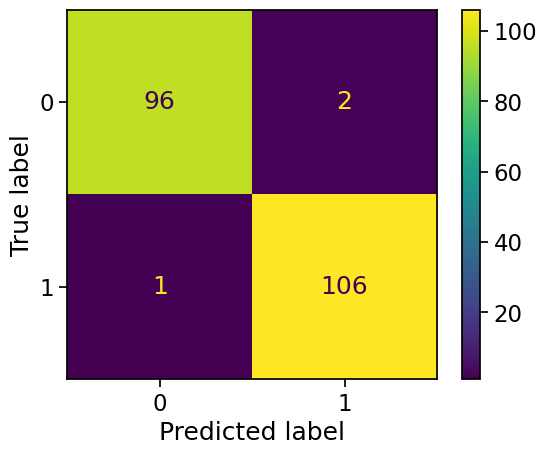

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_Randomforest.classes_)
disp.plot()
plt.show()

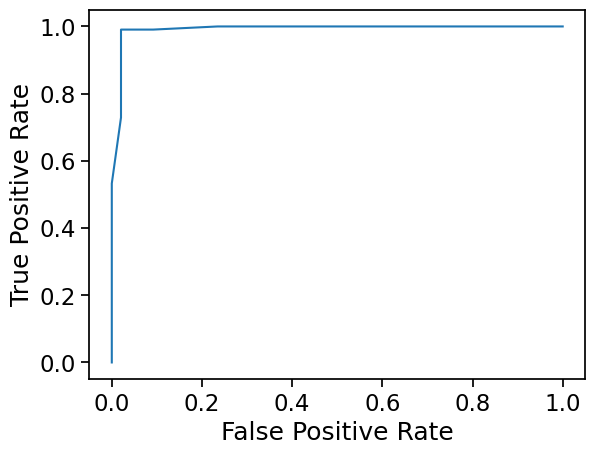

In [ ]:
from sklearn import metrics
y_pred_proba = model_Randomforest.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

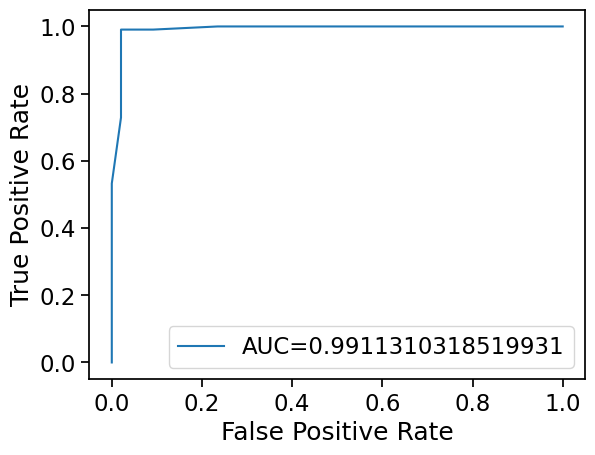

In [ ]:
y_pred_proba = model_Randomforest.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
print("Accuracy of the RandomForest Model : ", round(accuracy, 4), "%")
print("Precision score of the RandomForest Model : ", round(precision_score(y_test, y_predict_RF)*100, 4), "%")
print("Recall Score of the RandomForest Model : ", round(recall_score(y_test, y_predict_RF)*100, 4), "%")
print("F1 score of the RandomForest Model : ", round(f1_score(y_test, y_predict_RF)*100, 4), "%")

Accuracy of the RandomForest Model :  98.5366 %
Precision score of the RandomForest Model :  98.1481 %
Recall Score of the RandomForest Model :  99.0654 %
F1 score of the RandomForest Model :  98.6047 %


user interface

In [ ]:
user_data = []
user_data.append(int(input("Age : ")))
user_data.append(int(input("1. Male\n0. Female : ")))
user_data.append(int(input("chest pain type (0 - 4) : ")))
user_data.append(int(input("Resting blood pressure (in mm Hg on admission to the hospital) : ")))
user_data.append(int(input("Serum cholestoral in mg/dl : ")))
user_data.append(int(input("Fasting blood sugar &gt; 120 mg/dl (1 = true; 0 = false) : ")))
user_data.append(int(input("Resting electrocardiographic results : ")))
user_data.append(int(input("Maximum heart rate achieved : ")))
user_data.append(int(input("Exercise induced angina (1 = yes; 0 = no) : ")))
user_data.append(float(input("ST depression induced by exercise relative to rest : ")))

user_data = sc.fit_transform([user_data])
predicted =  model_Randomforest.predict(user_data)
if predicted == 1:
  print("Their is a chance of heart Disease, met the doctor immediately .")
else:
  print("NO Risk of heart disease .")


Age : 45
1. Male
0. Female : 1
chest pain type (0 - 4) : 0
Resting blood pressure (in mm Hg on admission to the hospital) : 137
Serum cholestoral in mg/dl : 210
Fasting blood sugar &gt; 120 mg/dl (1 = true; 0 = false) : 1
Resting electrocardiographic results : 00
Maximum heart rate achieved : 160
Exercise induced angina (1 = yes; 0 = no) : 1
ST depression induced by exercise relative to rest : 2.5
Their is a chance of heart Disease, met the doctor immediately .
